In [1]:
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from scipy import interp

# Amman, Jordan

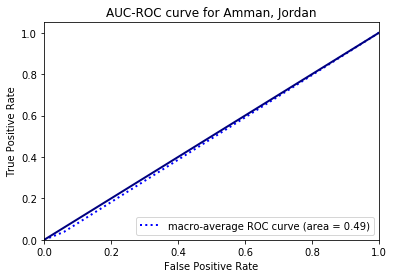

In [2]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')
 
series = read_csv('amman.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values.astype('float32')
size = int(len(X) * 0.95)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)


y_score = []
y_test = []
for i in range(len(predictions)):
	predicted = np.rint(predictions[i])
	if predicted > 1:
		predicted = 2
	actual = np.rint(test[i])
	if test[i]>1:
		actual = 2
	y_score.append(predicted)
	y_test.append(actual)

y_score = label_binarize(y_score, classes=[0, 1, 2])
y_test = label_binarize(y_test, classes=[0, 1, 2])


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

n_classes = 3
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
lw = 2
plt.plot(fpr['macro'], tpr['macro'], color='blue',
         lw=lw, label='macro-average ROC curve (area = %0.2f)' % roc_auc['macro'], linestyle=':')
plt.plot([0, 1], [0, 1], color='navy', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC curve for Amman, Jordan')
plt.legend(loc="lower right")
plt.show()

# Cairo, Egypt

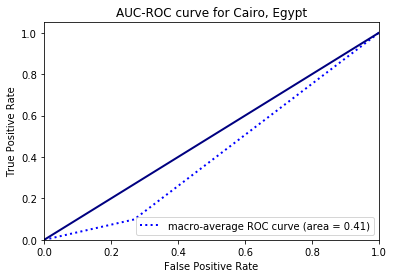

In [3]:
series = read_csv('cairo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values.astype('float32')
size = int(len(X) * 0.95)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)

y_score = []
y_test = []
for i in range(len(predictions)):
	predicted = predictions[i]
	if predicted > 0:
		predicted = 1
	else:
		predicted = 0
	actual = np.rint(test[i])
	if test[i]>1:
		actual = 2
	y_score.append(predicted)
	y_test.append(actual)

y_score = label_binarize(y_score, classes=[0, 1, 2])
y_test = label_binarize(y_test, classes=[0, 1, 2])


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

n_classes = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
lw = 2
plt.plot(fpr['macro'], tpr['macro'], color='blue',
         lw=lw, label='macro-average ROC curve (area = %0.2f)' % roc_auc['macro'], linestyle=':')
plt.plot([0, 1], [0, 1], color='navy', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC curve for Cairo, Egypt')
plt.legend(loc="lower right")
plt.show()

# Delhi, India

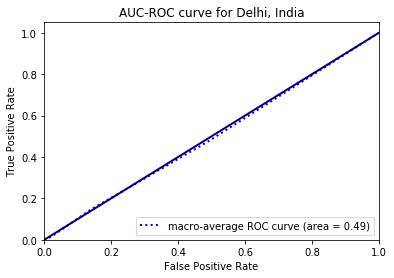

In [4]:
series = read_csv('delhi.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values.astype('float32')
size = int(len(X) * 0.95)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)

y_score = []
y_test = []
for i in range(len(predictions)):
	predicted = np.rint(predictions[i])
	if predicted > 3:
		predicted = np.asarray([4])
	actual = np.rint(test[i])
	if test[i]>3:
		actual = np.asarray([4])
	y_score.append(predicted)
	y_test.append(actual)

y_score = label_binarize(y_score, classes=[0, 1, 2, 3, 4])
y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4])


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

n_classes = 5
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
lw = 2
plt.plot(fpr['macro'], tpr['macro'], color='blue',
         lw=lw, label='macro-average ROC curve (area = %0.2f)' % roc_auc['macro'], linestyle=':')
plt.plot([0, 1], [0, 1], color='navy', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC curve for Delhi, India')
plt.legend(loc="lower right")
plt.show()